# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    V = np.pi**(D / 2) / sp.gamma(1 + D / 2) * R**D
    
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

При d=2 (круг) 3.141592653589793 ; точное значение 3.141592653589793
При d=3 (шар) 4.188790204786391 ; точное значение 4.1887902047863905


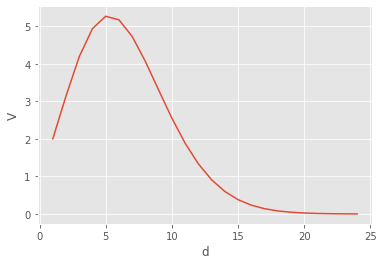

In [3]:
print('При d=2 (круг)', getSphereVolumeExact(2), '; точное значение', np.pi)
print('При d=3 (шар)', getSphereVolumeExact(3), '; точное значение', 4/3*np.pi)

D = np.arange(1,25,dtype=np.int)
V = np.array([])
for i in D:
    V = np.append(V, getSphereVolumeExact(i))

plt.plot(D, V)
plt.xlabel('d')
plt.ylabel('V')
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [4]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    G = 0 #количество точек, лежащих внутри шара
    for i in range(N):
        vect = np.random.rand(D)
        if(np.linalg.norm(vect,2) <= 1):
            G += 1

    V = (2 * R)**D * G / N
    
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

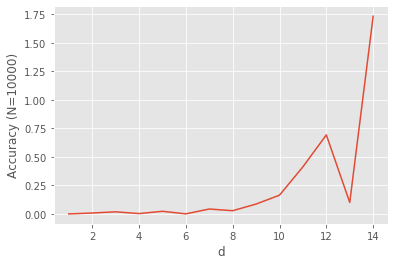

In [5]:
D = np.arange(1,15,dtype=np.int) 
eps_pseudo = np.array([]) 
N = 10000  
for i in D:
    Vexact = getSphereVolumeExact(i,1)
    Vrand = getSphereVolumePseudorandom(N,i,1)
    eps_pseudo = np.append(eps_pseudo, (Vexact - Vrand) / Vexact)

plt.plot(D, np.abs(eps_pseudo))
plt.xlabel('d')
plt.ylabel('Accuracy (N=10000)')
plt.show()

Уже при $N > 10$ объём сферы быстро уменьшается, а объем куба быстро растет, внутри сферы нет точек. Чтобы количество точек внутри сферы было ненулевым, нужно значительно увеличивать $N$, что увеличит время выполнения.

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [6]:
!pip install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [83]:
sobol_seq.i4_sobol_generate?

In [7]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    #Генерация квазислучайных последовательностей Соболя
    sobol = sobol_seq.i4_sobol_generate(D,N)

    G = 0 
    for vect in sobol:
        if(np.linalg.norm(vect) <= 1):
            G += 1

    V = (2 * R)**D * G / N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

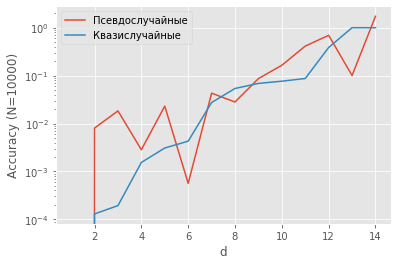

In [8]:
eps_quasi = np.array([]) 

for i in D:
    Vrand = getSphereVolumeQuasirandom(N,i)
    Vexact = getSphereVolumeExact(i)
    eps_quasi = np.append(eps_quasi,(Vexact - Vrand) / Vexact)

plt.plot(D, np.abs(eps_pseudo), label='Псевдослучайные')
plt.plot(D, np.abs(eps_quasi), label='Квазислучайные')
plt.xlabel('d')
plt.ylabel('Accuracy (N=10000)')
plt.yscale('log')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

При небольших размерностях точность для квазислучайной последовательности лучше на один порядок, чем для псевдослучайной, но в целом у методов нет преимуществ друг над другом.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [9]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.choice((-1,1), N**2)
    state = state.reshape(N, N)
    
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [10]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    #state1 - массив, в котором к state в конец добавлен первый столбец(по столбцам) и первая строка(по строкам). 
    #Это нужно, чтобы учесть топологию тора при расчете изменения энергии.
    
    state1 = np.append(state, [state[0,:]],axis=0)
    state1 = np.append(state1, np.array([np.append(state[:,0],0)]).T, axis=1)
    dE = 2 * state[i,j] * (state1[i,j-1] + state1[i,j+1] + state1[i-1,j] + state1[i+1,j])
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [11]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    for n in range(N**2):
        i = np.random.randint(N)
        j = np.random.randint(N)
        dE = getDeltaE(i, j, state)
        if dE > 0:
            #Поворот с нужной вероятностью
            state[i,j] = np.random.choice((-1,1), p=[np.exp(-dE/T), 1 - np.exp(-dE/T)]) * state[i,j]
        else:
            state[i,j] = -state[i,j]
            
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [12]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    for i in range(N):
        for j in range(N):
            E += -1/2*getDeltaE(i,j,state)
            #E = -J*state[i,j]*(сумма спинов рядом); dE = 2*J*state[i,j]*(сумма спинов рядом), cледовательно E = -1/2*dE
            
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [13]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [14]:
N       = 10         # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

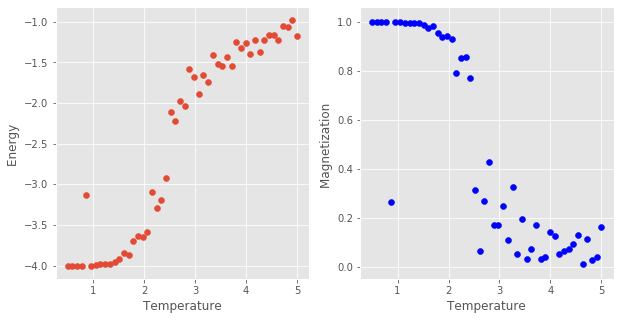

In [15]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Да. Видим, что с увеличеннием температуры энергия растёт, намагниченность уменьшается.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [22]:
N = 64
state = getInitialState(N)

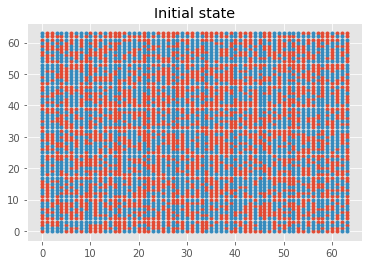

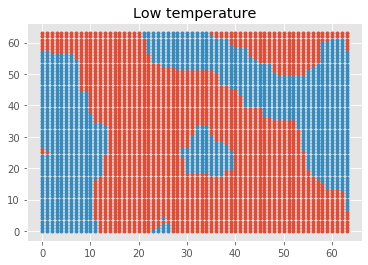

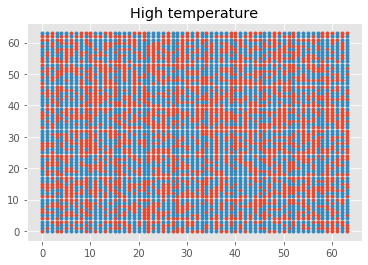

In [23]:
plt.plot(np.where(state - 1)[1], np.where(state - 1)[0], '.')
plt.plot(np.where(state + 1)[1], np.where(state + 1)[0], '.')
plt.title('Initial state')
plt.show()

for i in range(50):
    makeFlip(0.5, state)
    
plt.plot(np.where(state - 1)[1], np.where(state - 1)[0], '.')
plt.plot(np.where(state + 1)[1], np.where(state + 1)[0], '.')
plt.title('Low temperature')
plt.show()

for i in range(50):
    makeFlip(200, state)
    
plt.plot(np.where(state - 1)[1], np.where(state - 1)[0], '.')
plt.plot(np.where(state + 1)[1], np.where(state + 1)[0], '.')
plt.title('High temperature')
plt.show()
    

При низких температурах видим образование спиновых кластеров с одинаковым значением, при высоких этого не наблюдается, что соответствует намагниченности.